# Bank Customer Churn Research Project

**Objective:** 

The objective of the project is to determine which customer attributes can help us predict whether or not the customer will leave the bank.
 

**Expectation:**

Find out the set of features which determine a customer's decision to leave the bank.
Build a model that can help predict if a customer will churn or not

**Value Added by the Project:**

Understanding the factors that lead to discontinuation or churn a customer will help the bank improve customer retention strategies.

**Features and Label:**

1. RowNumber—corresponds to the record (row) number and has no effect on the output.

2. CustomerId—contains random values and has no effect on customer leaving the bank.

3. Surname—the surname of a customer has no impact on their decision to leave the bank.

4. CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

5. Geography—a customer’s location can affect their decision to leave the bank.

6. Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

7. Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

8. Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

9. Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

10. NumOfProducts—refers to the number of products that a customer has purchased through the bank.

11. HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

12. IsActiveMember—active customers are less likely to leave the bank.

13. EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

14. Exited—whether or not the customer left the bank.

15. Complain—customer has complaint or not.

16. Satisfaction Score—Score provided by the customer for their complaint resolution.

17. Card Type—type of card hold by the customer.

18. Points Earned—the points earned by the customer for using credit card.

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score, f1_score, roc_auc_score,ConfusionMatrixDisplay

## Dataset reading and Exploration:

In [136]:
data = pd.read_csv('Customer-Churn-Records.csv')

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [138]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [139]:
data.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [140]:
data.select_dtypes('number')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,1,300
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,5,771
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1,1,3,564
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,2,339


In [141]:
data.select_dtypes('object')

,Surname,Geography,Gender,Card Type
0,Hargrave,France,Female,DIAMOND
1,Hill,Spain,Female,DIAMOND
2,Onio,France,Female,DIAMOND
3,Boni,France,Female,GOLD
4,Mitchell,Spain,Female,GOLD
...,...,...,...,...
9995,Obijiaku,France,Male,DIAMOND
9996,Johnstone,France,Male,PLATINUM
9997,Liu,France,Female,SILVER
9998,Sabbatini,Germany,Male,GOLD


In [142]:
data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

**Interpretation:**

1. Read the dataset into dataframe.
2. Performed formal exploration to understand its structure and found out that it has 10000 rows and 18 columns.
2. Explored features types and found out that there are 14 numerical and 4 categorical columns
4. There are no missing values.

## Exploratory Data Analysis (EDA):

### Checking composition of Categorical Features 

In [143]:
data_cat=data.select_dtypes('object')
data_cat

,Surname,Geography,Gender,Card Type
0,Hargrave,France,Female,DIAMOND
1,Hill,Spain,Female,DIAMOND
2,Onio,France,Female,DIAMOND
3,Boni,France,Female,GOLD
4,Mitchell,Spain,Female,GOLD
...,...,...,...,...
9995,Obijiaku,France,Male,DIAMOND
9996,Johnstone,France,Male,PLATINUM
9997,Liu,France,Female,SILVER
9998,Sabbatini,Germany,Male,GOLD


In [144]:
for i in data_cat.columns.to_list():
    print(i," : ")
    print("==========================================")
    print(data[i].value_counts())
    print("==========================================")
    print('\n')

Surname  : 
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64


Geography  : 
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


Gender  : 
Male      5457
Female    4543
Name: Gender, dtype: int64


Card Type  : 
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64




**Interpretation:**
1. There are 2932 unique values in surname feature
2. The surname of a customer has no impact on their decision to leave the bank, hence we can drop it.
3. There is a slight difference between the male and female customers.
4. Most of the customers in the dataset are from France.
5. There are 4 different types of card provided by the bank.

### Checking Distribution of Numerical Features

In [145]:
data_num=data.select_dtypes('number')
data_num.nunique()

RowNumber             10000
CustomerId            10000
CreditScore             460
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Point Earned            785
dtype: int64

**Interpretation:**
1. There are 10000 unique values in RowNumber and Customer feature.
2. Also these features have no impact on the decision to leave the bank, hence we can drop them.
3. The columns balance and EstimatedSalary has a lot unique values which is practical in the real world.
4. There are 6 Discrete Numerical columns i.e NumOfProducts, HasCrCard, IsActiveMember,Exited,Complain and Satisfaction Score.

### Dropping irrelevant columns:

In [146]:
data.drop(['RowNumber','CustomerId','Surname'],inplace=True, axis=1)

In [147]:
# Discrete numerical features:
discrete_features=[]
for i in data.select_dtypes('number').columns.tolist():
    if(data[i].nunique()<=20):
        discrete_features.append(i)
discrete_features

['Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited',
 'Complain',
 'Satisfaction Score']

In [148]:
data.describe(include='all')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507,NaN
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,NaN,606.515100
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,NaN,225.924839
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,NaN,119.000000
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,NaN,410.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,NaN,605.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,NaN,801.000000


**Interpretation:**
* Balance have a lot of 0 values
* Age columns seems to be skewed in the positive direction
* France has more than half of the customers with count of customers = 5014
* Estimated salary has a big gap between its upper limit and Q3 and lower limit and Q1.
* Points Earned seems to be normally distributed

### Target Variable composition

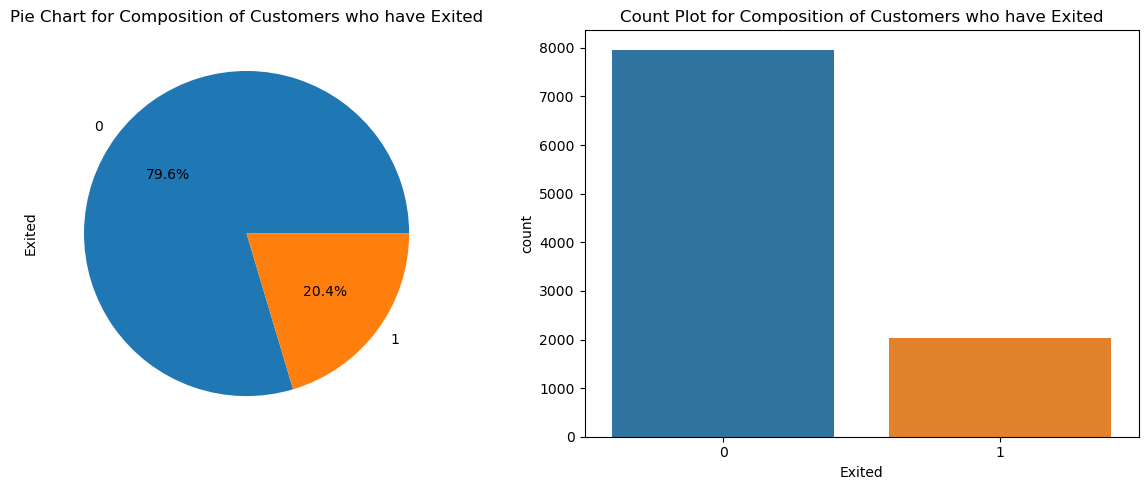

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
data['Exited'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart for Composition of Customers who have Exited')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Exited')
plt.title('Count Plot for Composition of Customers who have Exited')

plt.tight_layout()
plt.show()

**Interpretation:**
* The label column is imbalanced hence we have to do a work around.

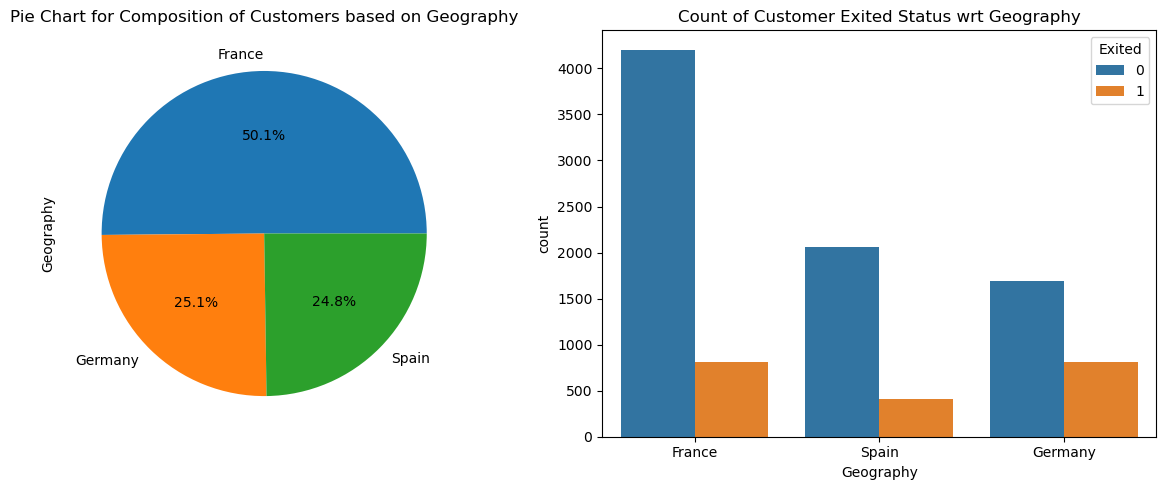

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
data['Geography'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart for Composition of Customers based on Geography')

plt.subplot(1, 2, 2)
sns.countplot(data=data, hue='Exited',x='Geography')
plt.title('Count of Customer Exited Status wrt Geography')

plt.tight_layout()
plt.show()

In [151]:
# Churn rate wrt gender
churn_rate_gender = data.groupby('Geography')['Exited'].mean()*100
print(round(churn_rate_gender,2))

Geography
France     16.17
Germany    32.44
Spain      16.67
Name: Exited, dtype: float64


**Interpretation:**

Germany has the highest churn rate (32.4%), followed by Spain (16.7%) and France (16.2%). This suggests that geographic location may impact customer churn, with customers in certain countries more prone to churn.

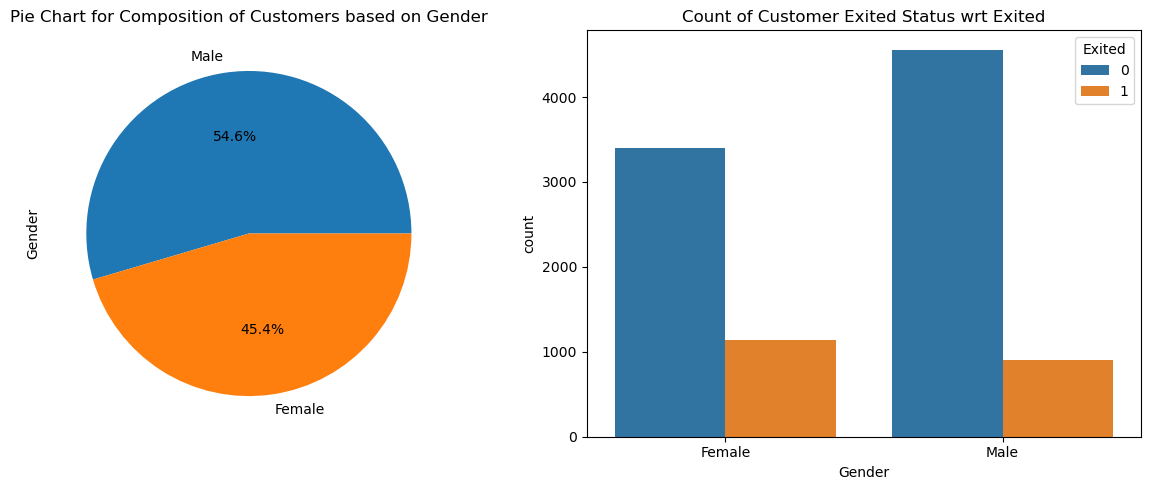

In [152]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart for Composition of Customers based on Gender')

plt.subplot(1, 2, 2)
sns.countplot(data=data, hue='Exited',x='Gender')
plt.title('Count of Customer Exited Status wrt Exited')

plt.tight_layout()
plt.show()

In [153]:
# Churn rate wrt gender
churn_rate_gender = data.groupby('Gender')['Exited'].mean()*100
print(round(churn_rate_gender,2))

Gender
Female    25.07
Male      16.47
Name: Exited, dtype: float64


**Interpretation:**
    
The churn rate is higher for female customers (25.1%) compared to male customers (16.5%). This indicates that gender may play a role in customer churn, with female customers being more likely to churn.

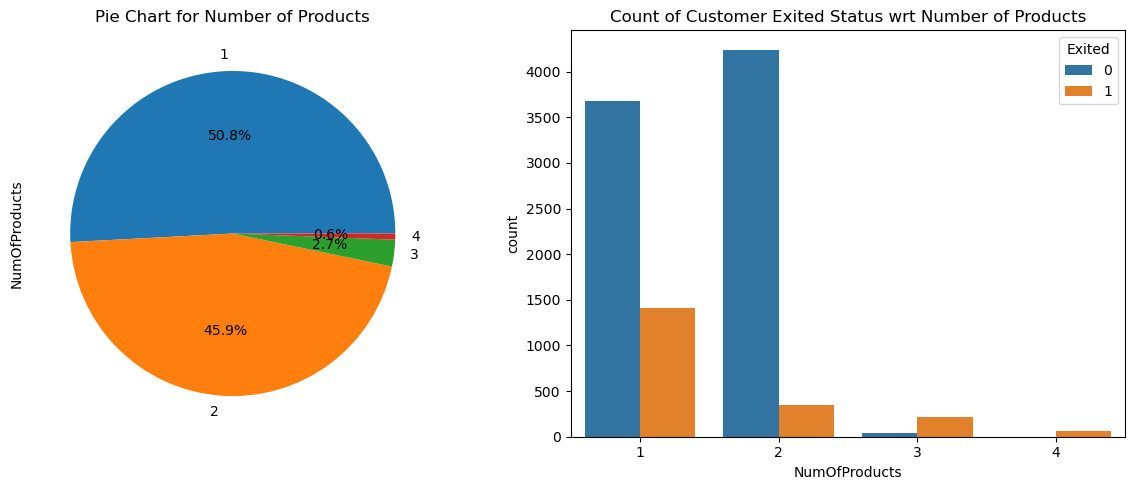

In [154]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
data['NumOfProducts'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart for Number of Products')

plt.subplot(1, 2, 2)
sns.countplot(data=data, hue='Exited', x='NumOfProducts')
plt.title('Count of Customer Exited Status wrt Number of Products')

plt.tight_layout()
plt.show()

In [155]:
# Churn rate wrt credit card 
churn_rate_hasCard= data.groupby('NumOfProducts')['Exited'].mean()*100
print(round(churn_rate_hasCard,2))

NumOfProducts
1     27.71
2      7.60
3     82.71
4    100.00
Name: Exited, dtype: float64


**Interpretation:**

* The number of products held by customers can impact churn. Customers with fewer products may be less likely to churn, while those with more products may have a higher churn rate. Further analysis is required to understand the specific relationship.

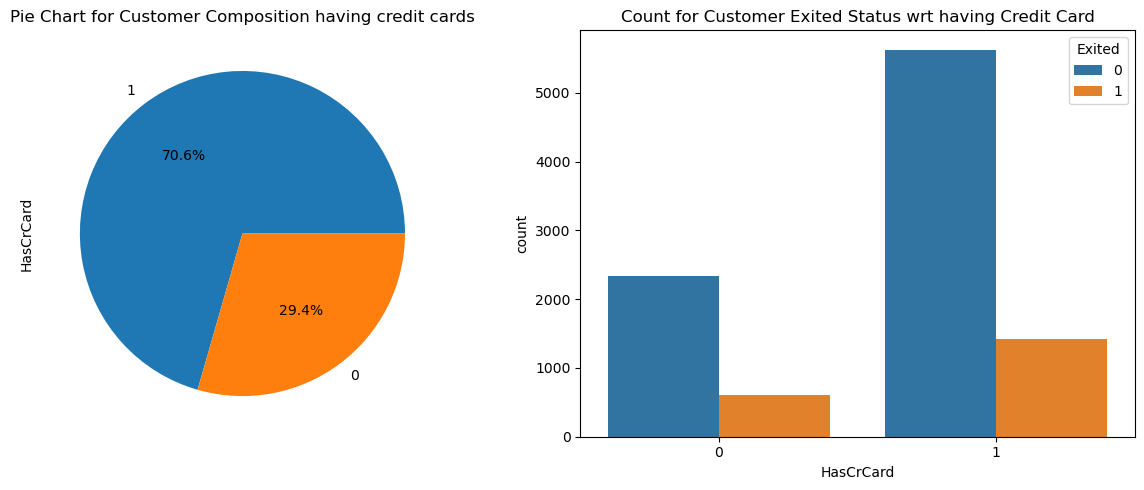

In [156]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
data['HasCrCard'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart for Customer Composition having credit cards')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='HasCrCard', hue='Exited')
plt.title('Count for Customer Exited Status wrt having Credit Card')

plt.tight_layout()
plt.show()

In [157]:
# Churn rate wrt credit card 
churn_rate_hasCard= data.groupby('HasCrCard')['Exited'].mean()*100
print(round(churn_rate_hasCard,2))

HasCrCard
0    20.81
1    20.20
Name: Exited, dtype: float64


**Interpretation:**

* Having a credit card does not seem to have a significant impact on customer churn. The churn rate appears similar for customers with and without a credit card. Therefore, credit card ownership alone may not be a strong indicator of churn.

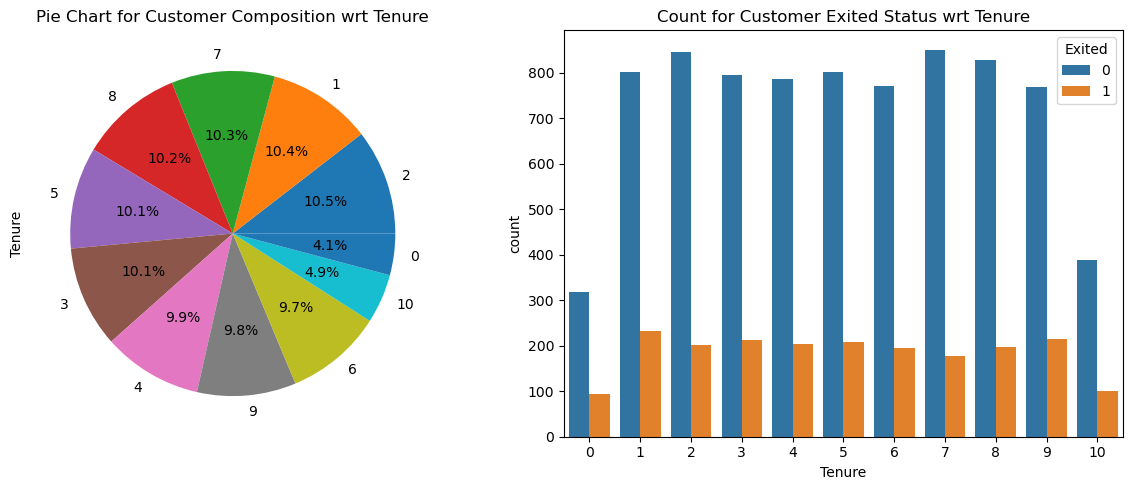

In [158]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
data['Tenure'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart for Customer Composition wrt Tenure')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Tenure', hue='Exited')
plt.title('Count for Customer Exited Status wrt Tenure')

plt.tight_layout()
plt.show()

**Interpretation:**

* Having a smaller or larger tenure does not seem to have a significant impact on customer churn. The churn rate appears similar for customers across the tenure with some fall in numbers of churn for customers with a tenure equal to 0 and 10. Therefore, tenure may not be a strong indicator of churn.

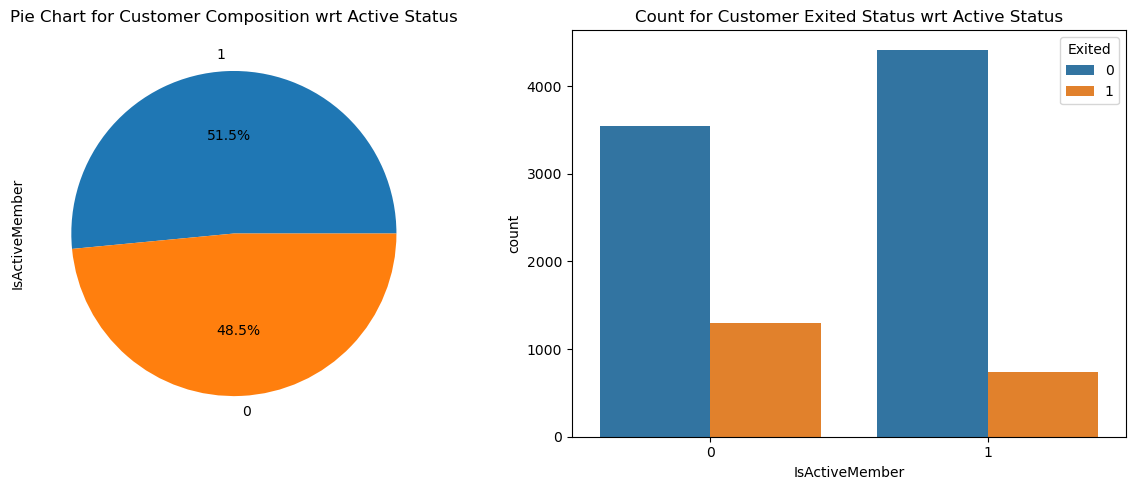

In [159]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
data['IsActiveMember'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart for Customer Composition wrt Active Status')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='IsActiveMember', hue='Exited')
plt.title('Count for Customer Exited Status wrt Active Status')

plt.tight_layout()
plt.show()

In [160]:
# Churn rate wrt active status
churn_rate_isact = data.groupby('IsActiveMember')['Exited'].mean()*100
print(round(churn_rate_isact,2))

IsActiveMember
0    26.87
1    14.27
Name: Exited, dtype: float64


**Interpretation:**

* Customer activity status is another important factor. Active members appear to have a lower churn rate compared to inactive members. This suggests that engaged and active customers are more likely to stay with the bank.

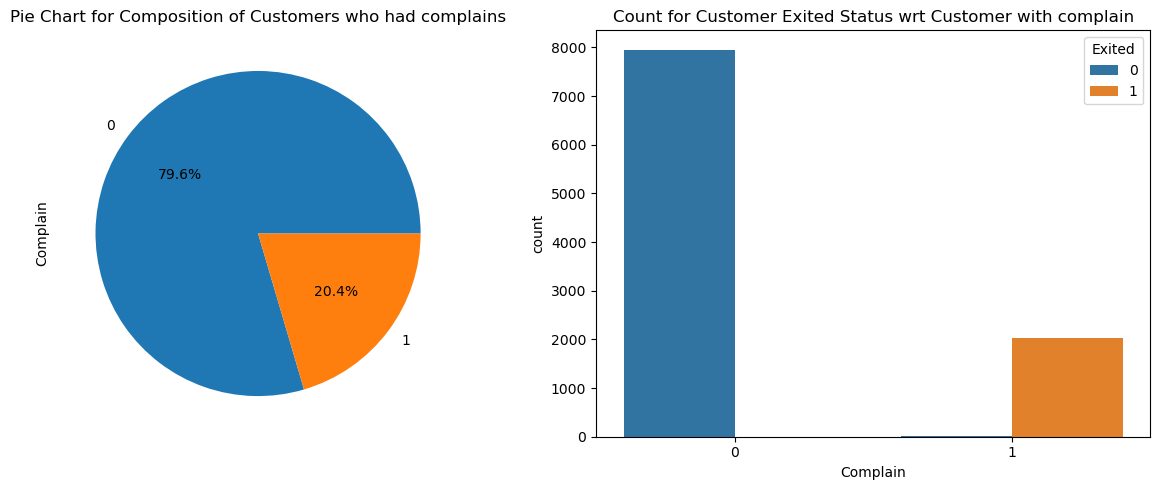

In [161]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
data['Complain'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart for Composition of Customers who had complains')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Complain',hue='Exited')
plt.title('Count for Customer Exited Status wrt Customer with complain')

plt.tight_layout()
plt.show()

In [162]:
# Churn rate wrt complain
churn_rate_isact = data.groupby('Complain')['Exited'].mean()*100
print(round(churn_rate_isact,2))

Complain
0     0.05
1    99.51
Name: Exited, dtype: float64


**Interpretation:**
    
The distribution of complain show a clear distinction between churned and retained customers. 99.51 percent of the customers who had a complain exited the bank. Therefore, complain may be a very strong indicator of churn. 

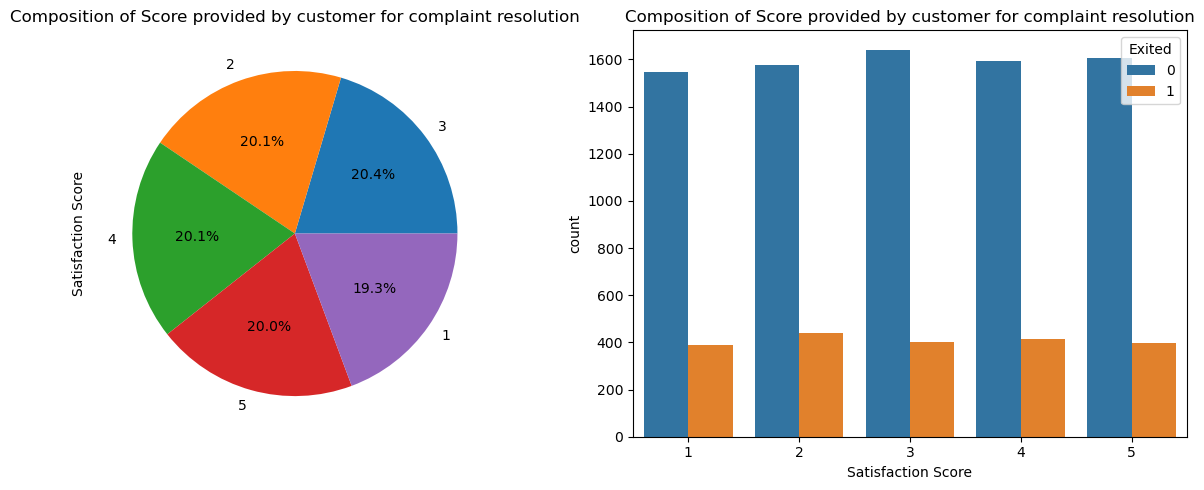

In [163]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
data['Satisfaction Score'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Composition of Score provided by customer for complaint resolution')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Satisfaction Score',hue='Exited')
plt.title('Composition of Score provided by customer for complaint resolution')

plt.tight_layout()
plt.show()

In [164]:
# Churn rate wrt complain
churn_rate_isact = data.groupby('Satisfaction Score')['Exited'].mean()*100
print(round(churn_rate_isact,2))

Satisfaction Score
1    20.03
2    21.80
3    19.64
4    20.62
5    19.81
Name: Exited, dtype: float64


**Interpretation:**

The composition of churned customers is similar for all values of Satisfaction score. Further analysis may be required to explore the relationship between satisfaction score and churn in more detail.

In [165]:
# Continous numerical features:
continous_features=[]
for i in data.select_dtypes('number').columns.tolist():
    if(data[i].nunique()>=20):
        continous_features.append(i)
continous_features

['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned']

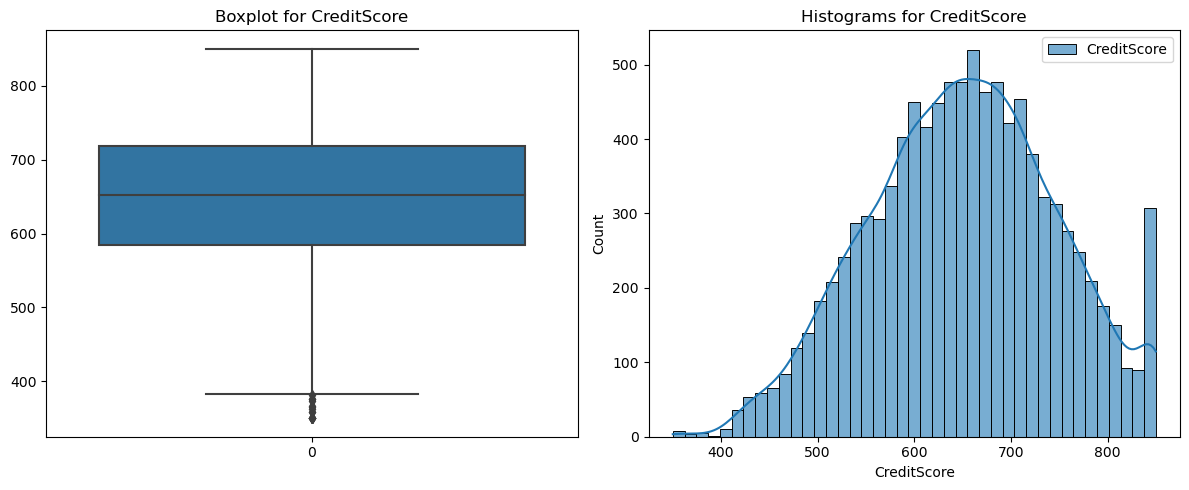

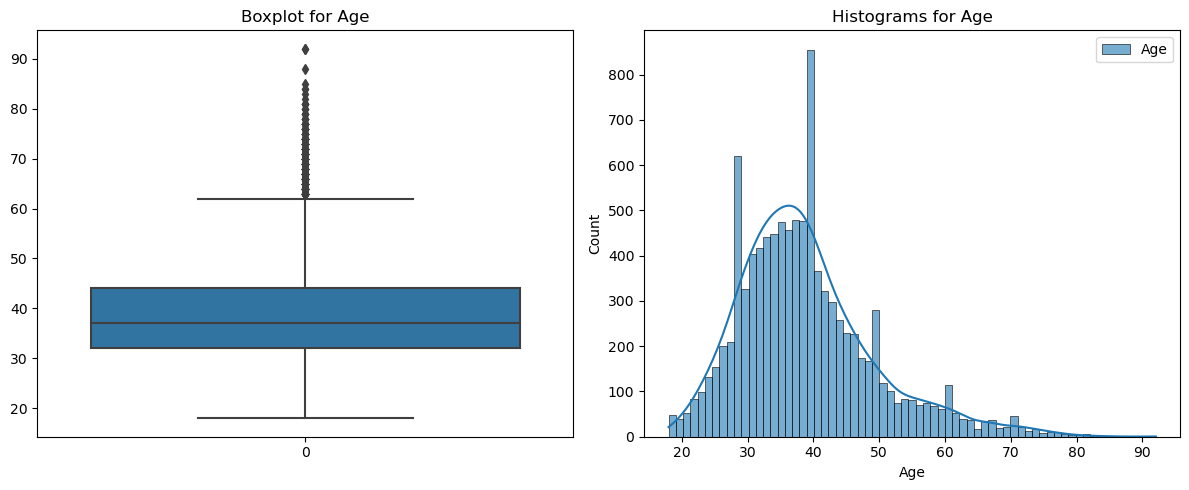

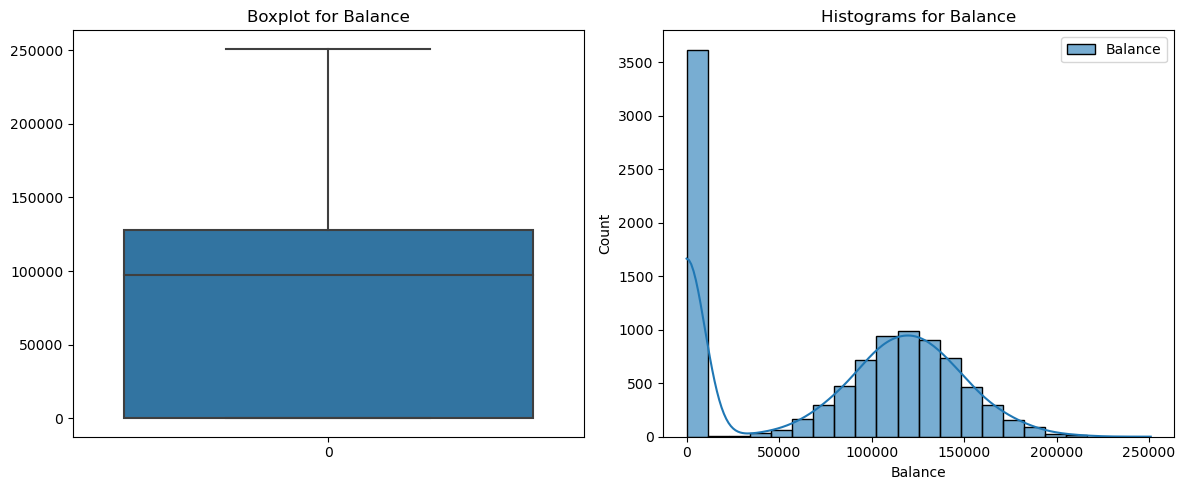

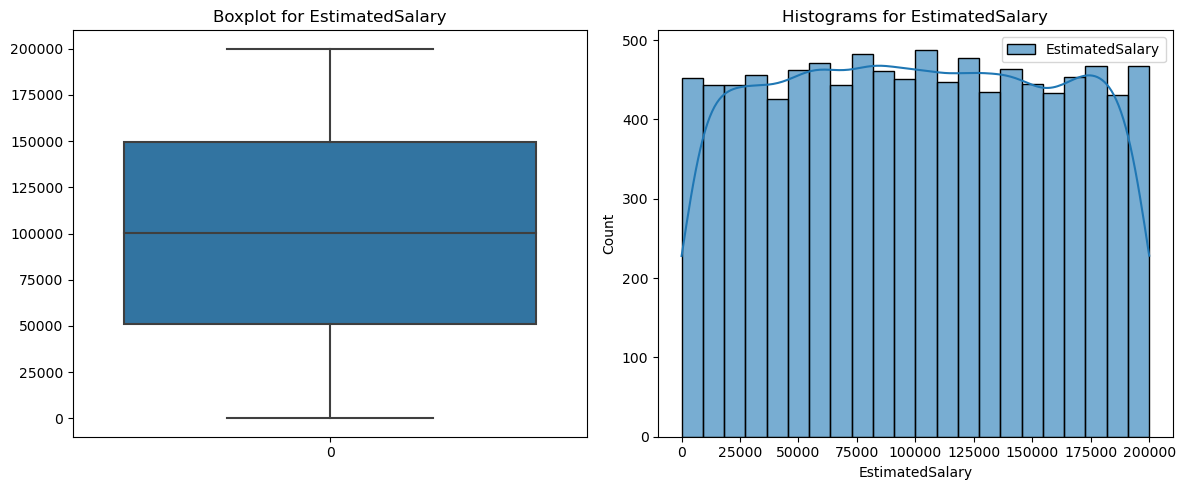

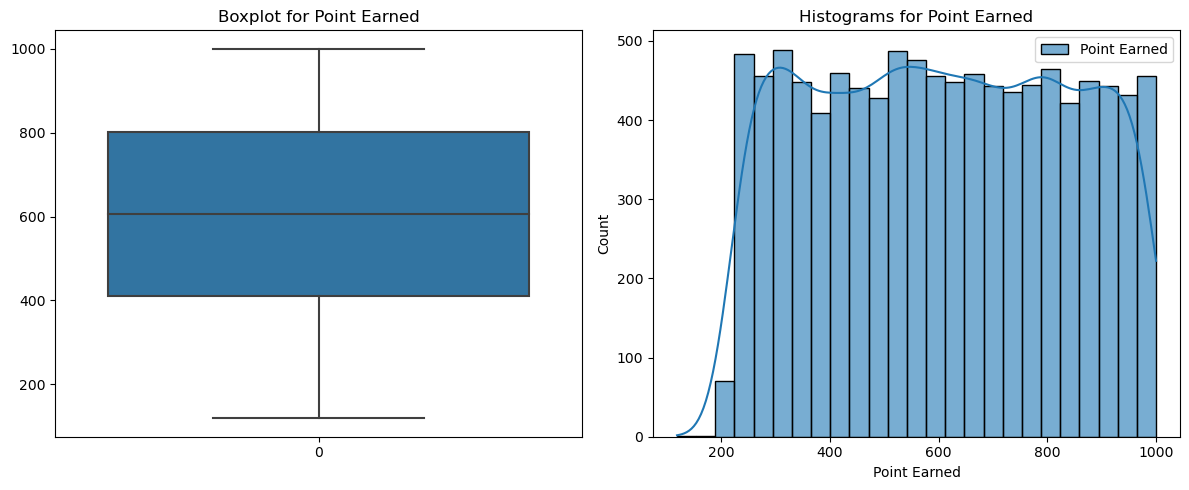

In [166]:
for i in continous_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(data=data[i])
    plt.title('Boxplot for '+i)

    plt.subplot(1, 2, 2)
    sns.histplot(data[i], kde=True, label=i, alpha=0.6)
    plt.legend()
    plt.title('Histograms for '+i)

    plt.tight_layout()
    plt.show()

**Interpretation:**

1. Age column is positively skewed.
2. About 3500+ customers have 0 balance in their account while rest all customers' bank balance is normally distributed.
3. Estimated salary is uniformly distributed
4. Point Earned column is somewhat uniformly distributed.
5. Credict Score column is slightly left skewed.

In [167]:
data.skew()

CreditScore          -0.071607
Age                   1.011320
Tenure                0.010991
Balance              -0.141109
NumOfProducts         0.745568
HasCrCard            -0.901812
IsActiveMember       -0.060437
EstimatedSalary       0.002085
Exited                1.470845
Complain              1.466263
Satisfaction Score   -0.008936
Point Earned          0.008344
dtype: float64

**Interpretation:**

1. There are acceptable amount of skewness in Age, Exited and Complain feature.
2. All other features donot show any significant amount of skewness.

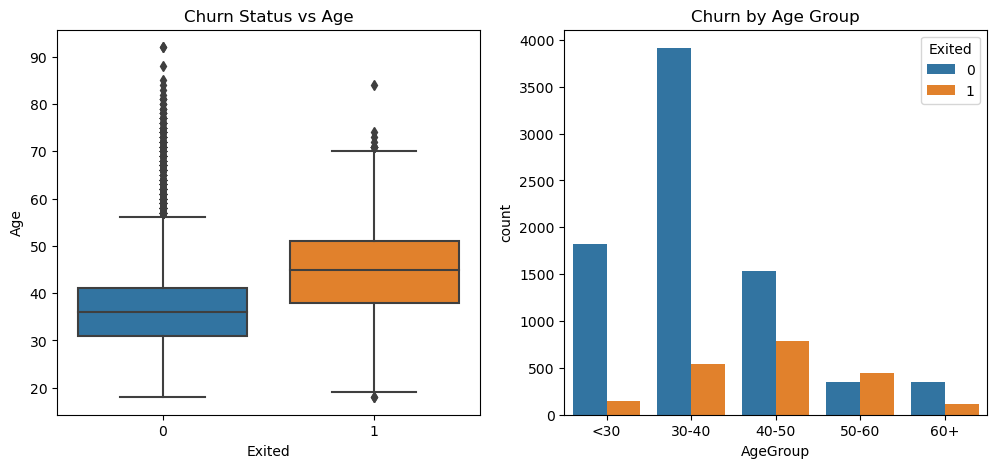

In [168]:
#Churn by age group

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='Age', data=data)
plt.title('Churn Status vs Age')

#taking a temperary Dataframe and creating Age Group Column using Age column for better insights.
temp=pd.DataFrame()
bins = [0, 30, 40, 50, 60, data['Age'].max()]
labels = ['<30', '30-40', '40-50', '50-60', '60+']
temp['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

plt.subplot(1, 2, 2)
sns.countplot(x=temp['AgeGroup'], hue=data['Exited'])
plt.title('Churn by Age Group')
plt.show()

In [169]:
# temporary dataframe
temp['Exited']=data['Exited']
churn_rate_age = temp.groupby('AgeGroup')['Exited'].mean()
print(churn_rate_age)

AgeGroup
<30      0.075203
30-40    0.121096
40-50    0.339655
50-60    0.562108
60+      0.247845
Name: Exited, dtype: float64


**Interpretation:**
    
* Age group strongly influences churn rate. The highest churn rate is observed in the 50-60 age group (56.2%), followed by the 40-50 age group (33.9%). The lowest churn rate is observed in the <30 age group (7.5%). This implies that older customers are more likely to churn, while younger customers are more likely to stay with the bank.

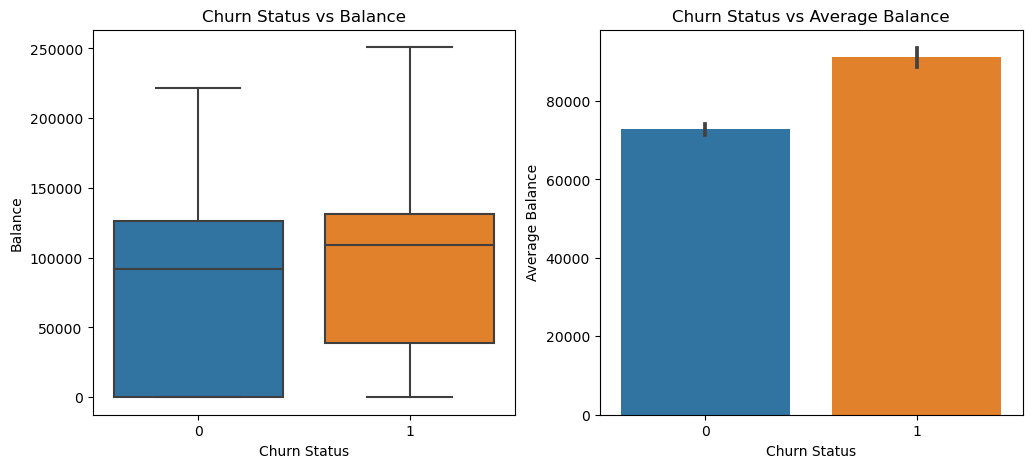

In [170]:
# Churn by Bank Balance
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='Balance', data=data)
plt.title('Churn Status vs Balance')
plt.xlabel('Churn Status')
plt.ylabel('Balance')

plt.subplot(1, 2, 2)
sns.barplot(x='Exited', y='Balance', data=data, estimator=np.mean)
plt.title('Churn Status vs Average Balance')
plt.xlabel('Churn Status')
plt.ylabel('Average Balance')
plt.show()

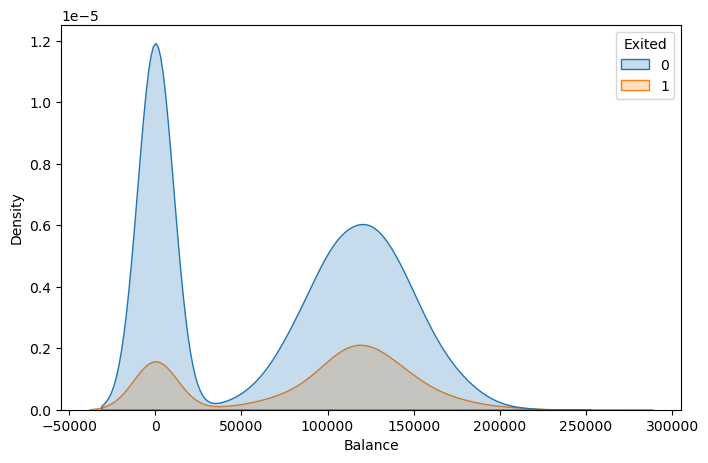

In [171]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=data,x='Balance',hue='Exited',shade=True)
plt.show()

**Interpretation:**
A lot of customers have 0 bank balance. Apart from that, for rest all of the customers bank balance seems to lie between 5000 to 200000.
The distribution of account balances does not show a clear distinction between churned and retained customers. Further the bank balance of customers who have churned have comparatively higher average Balance than the not churned ones.

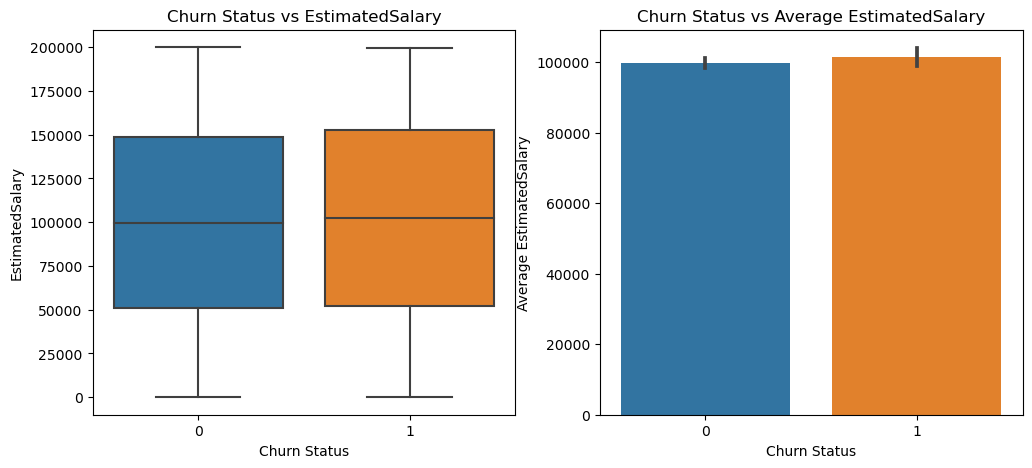

In [172]:
# Churn by Estimated Salary
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='EstimatedSalary', data=data)
plt.title('Churn Status vs EstimatedSalary')
plt.xlabel('Churn Status')
plt.ylabel('EstimatedSalary')

plt.subplot(1, 2, 2)
sns.barplot(x='Exited', y='EstimatedSalary', data=data, estimator=np.mean)
plt.title('Churn Status vs Average EstimatedSalary')
plt.xlabel('Churn Status')
plt.ylabel('Average EstimatedSalary')
plt.show()

**Interpretation:**

The distribution of Estimated does not show a clear distinction between churned and retained customers.Further analysis is required to explore the relationship between balance and churn in more detail.

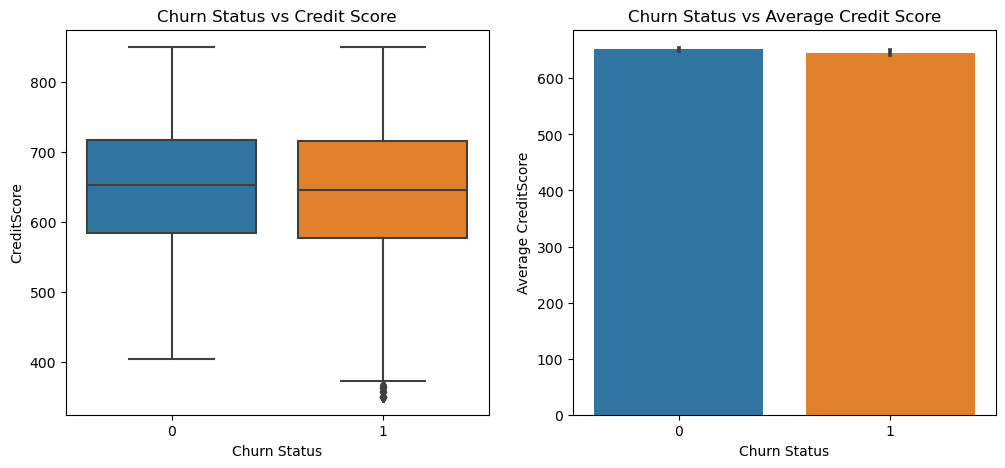

In [173]:
# Churn by Credit Score
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='CreditScore', data=data)
plt.title('Churn Status vs Credit Score')
plt.xlabel('Churn Status')
plt.ylabel('CreditScore')

plt.subplot(1, 2, 2)
sns.barplot(x='Exited', y='CreditScore', data=data, estimator=np.mean)
plt.title('Churn Status vs Average Credit Score')
plt.xlabel('Churn Status')
plt.ylabel('Average CreditScore')
plt.show()

**Interpretation:**

The distribution of Estimated Salary does not show a clear distinction between churned and retained customers.Further analysis is required to explore the relationship between balance and churn in more detail.

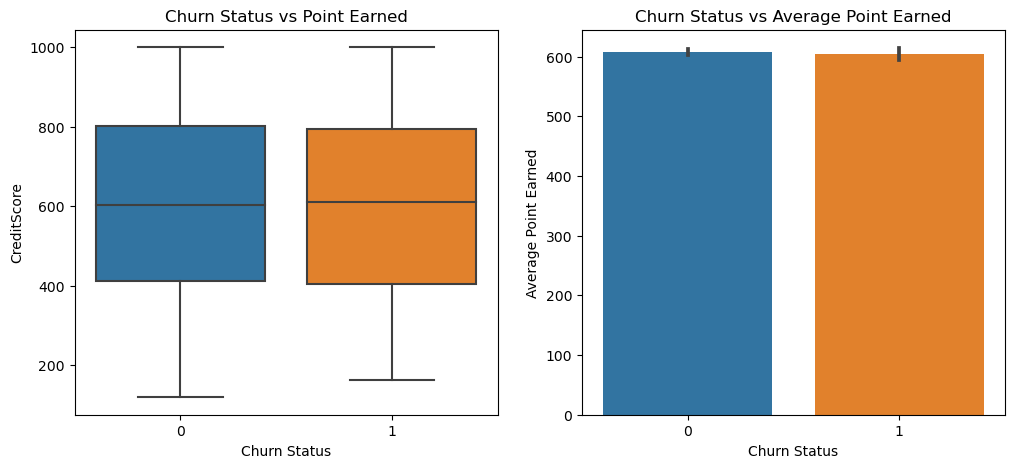

In [174]:
# Churn by Points Earned
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='Point Earned', data=data)
plt.title('Churn Status vs Point Earned')
plt.xlabel('Churn Status')
plt.ylabel('CreditScore')

plt.subplot(1, 2, 2)
sns.barplot(x='Exited', y='Point Earned', data=data, estimator=np.mean)
plt.title('Churn Status vs Average Point Earned')
plt.xlabel('Churn Status')
plt.ylabel('Average Point Earned')
plt.show()

**Interpretation:**

The distribution of Point Earned does not show a clear distinction between churned and retained customers.Further analysis is required to explore the relationship between balance and churn in more detail.

### Checking for Outliers:

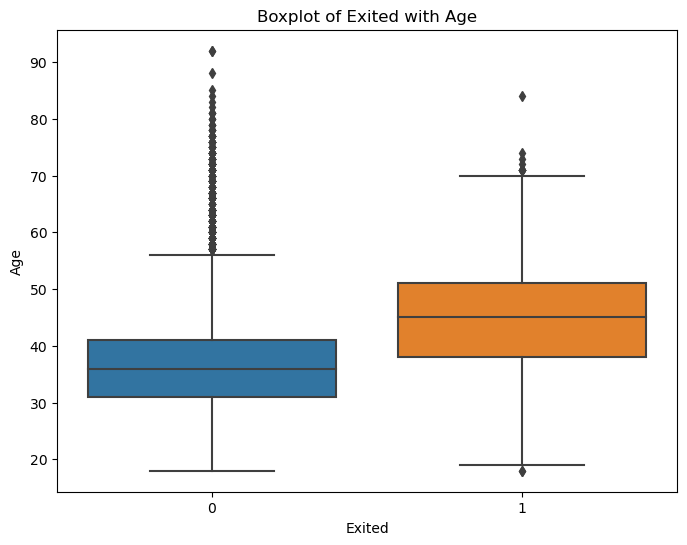

In [175]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='Age', data=data)
plt.title('Boxplot of Exited with Age')
plt.show()

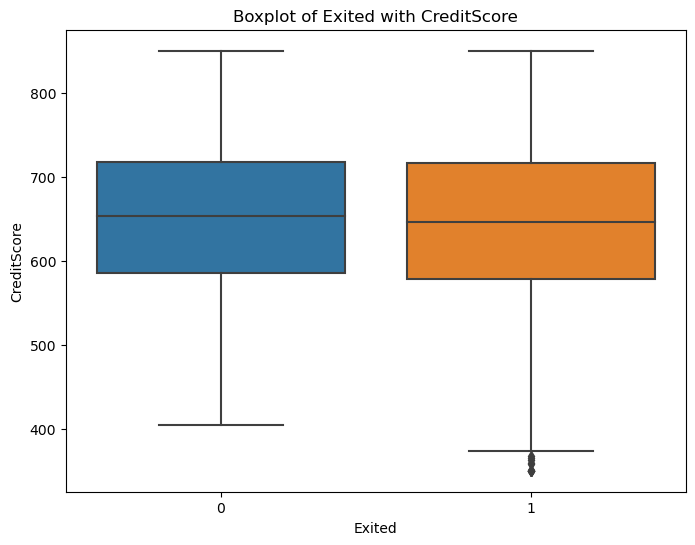

In [176]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='CreditScore', data=data)
plt.title('Boxplot of Exited with CreditScore')
plt.show()

**Interpretation:**

1. Age group have some outliers in above 70 churned customers. Most of the customers who have churned are in the age group of 35 to 60.
2. There are some outliers in creditScore column. There are few people who have a score less than 400, and they seem to have churned.

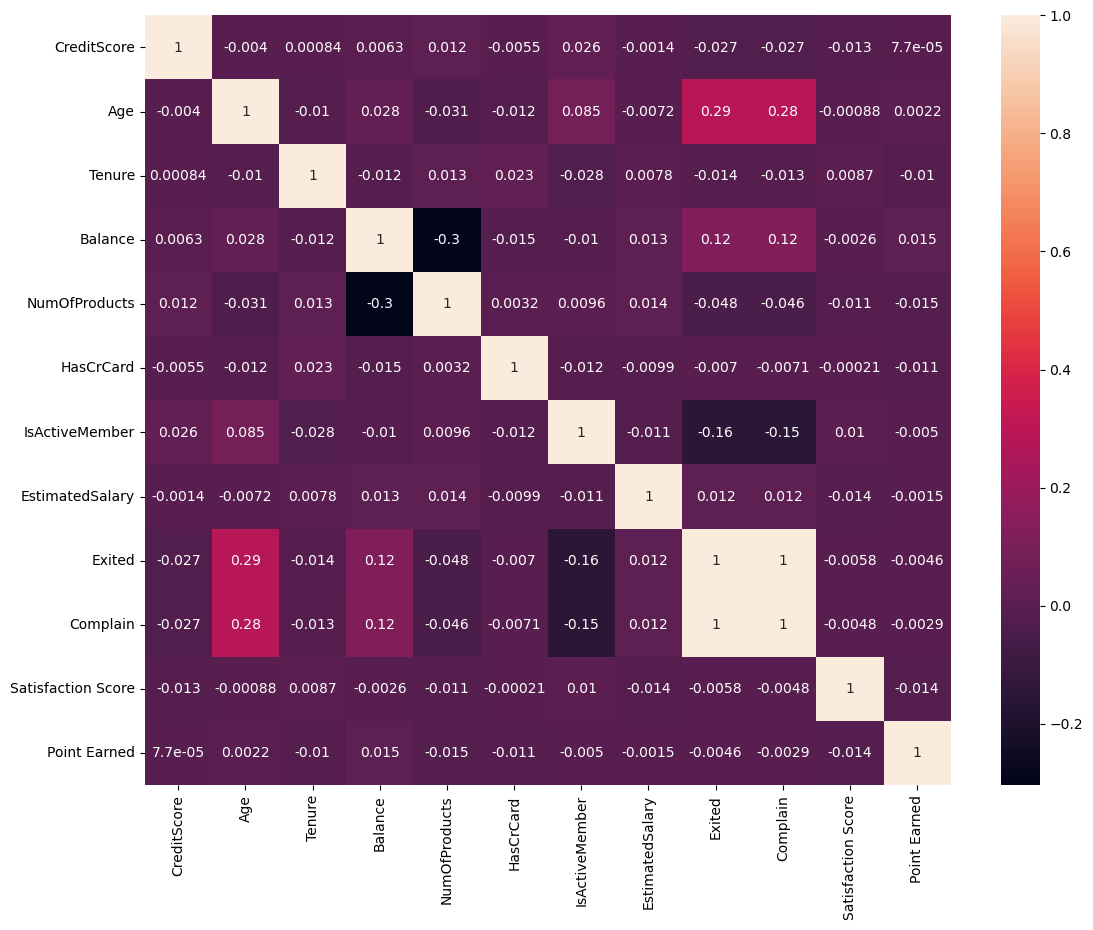

In [177]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

**Interpretation:**

1. There is 100% correlation between the target variable Exited and the Complain variable. This feature can be a great predictor of the Exited column.
2. Age also shows certain amount of positive correlation with Exited Column. This feature can be also taken into consideration.

In [178]:
data.shape

(10000, 15)

## Feature Scaling

In [179]:
data_num = data.select_dtypes('number')
y=data_num['Exited']
data_num = data_num.drop(['Exited'],axis=1)

In [180]:
from sklearn.preprocessing import StandardScaler

In [181]:
scaler = StandardScaler()
data_num_scaled= scaler.fit_transform(data_num)

In [182]:
data_num_scaled=pd.DataFrame(data_num_scaled,columns=data_num.columns,index=data_num.index)
data_num_scaled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.972908,-0.721130,-0.630839
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,1.972908,-0.009816,-0.666251
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.972908,-0.009816,-1.015942
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.506866,1.412812,-1.135457
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.506866,1.412812,-0.803472
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.506866,-1.432445,-1.356781
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.506866,1.412812,0.728088
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.972908,-0.009816,-0.188192
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.972908,-0.721130,-1.184148


## Encoding Categorical Data

In [183]:
data_cat = data.select_dtypes('object')
data_cat

,Geography,Gender,Card Type
0,France,Female,DIAMOND
1,Spain,Female,DIAMOND
2,France,Female,DIAMOND
3,France,Female,GOLD
4,Spain,Female,GOLD
...,...,...,...
9995,France,Male,DIAMOND
9996,France,Male,PLATINUM
9997,France,Female,SILVER
9998,Germany,Male,GOLD


In [184]:
data_cat_encoded= pd.get_dummies(data_cat,drop_first=True,dtype='int') #drop_first is used to remove multicollinearity
data_cat_encoded

,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,0,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,1,0,0
4,0,1,0,1,0,0
...,...,...,...,...,...,...
9995,0,0,1,0,0,0
9996,0,0,1,0,1,0
9997,0,0,0,0,0,1
9998,1,0,1,1,0,0


## Merge X_num_scaled and X_cat_encoded into X

In [185]:
data=pd.concat([data_num_scaled,data_cat_encoded,y],axis=1)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Exited
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.972908,-0.721130,-0.630839,0,0,0,0,0,0,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,1.972908,-0.009816,-0.666251,0,1,0,0,0,0,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.972908,-0.009816,-1.015942,0,0,0,0,0,0,1
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.506866,1.412812,-1.135457,0,0,0,1,0,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.506866,1.412812,-0.803472,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.506866,-1.432445,-1.356781,0,0,1,0,0,0,0
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.506866,1.412812,0.728088,0,0,1,0,1,0,0
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.972908,-0.009816,-0.188192,0,0,0,0,0,1,1
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.972908,-0.721130,-1.184148,1,0,1,1,0,0,1


In [186]:
data_copy=data.drop(columns='Exited')

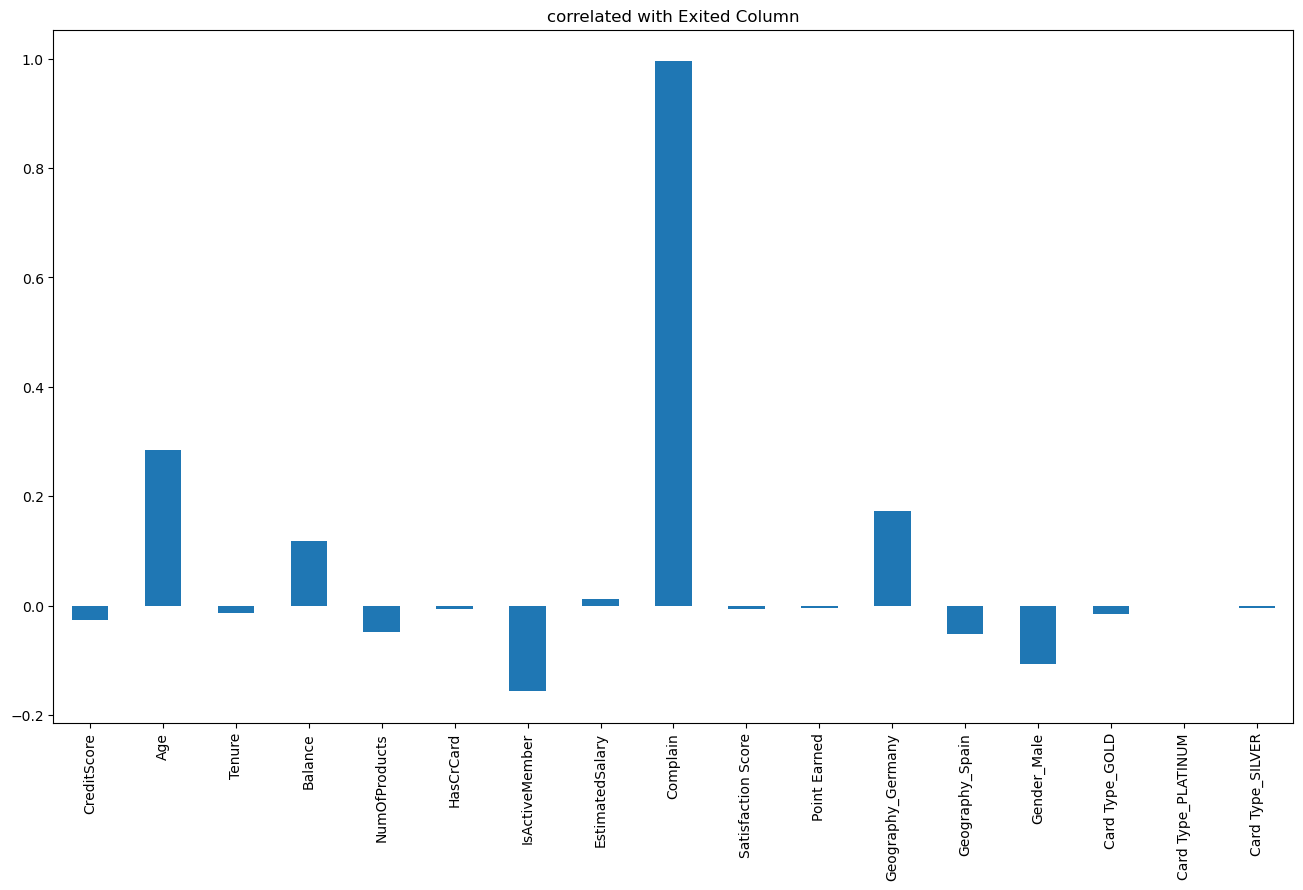

In [187]:
data_copy.corrwith(data['Exited']).plot(kind='bar',figsize=(16,9),title='correlated with Exited Column',rot=90)
plt.show()

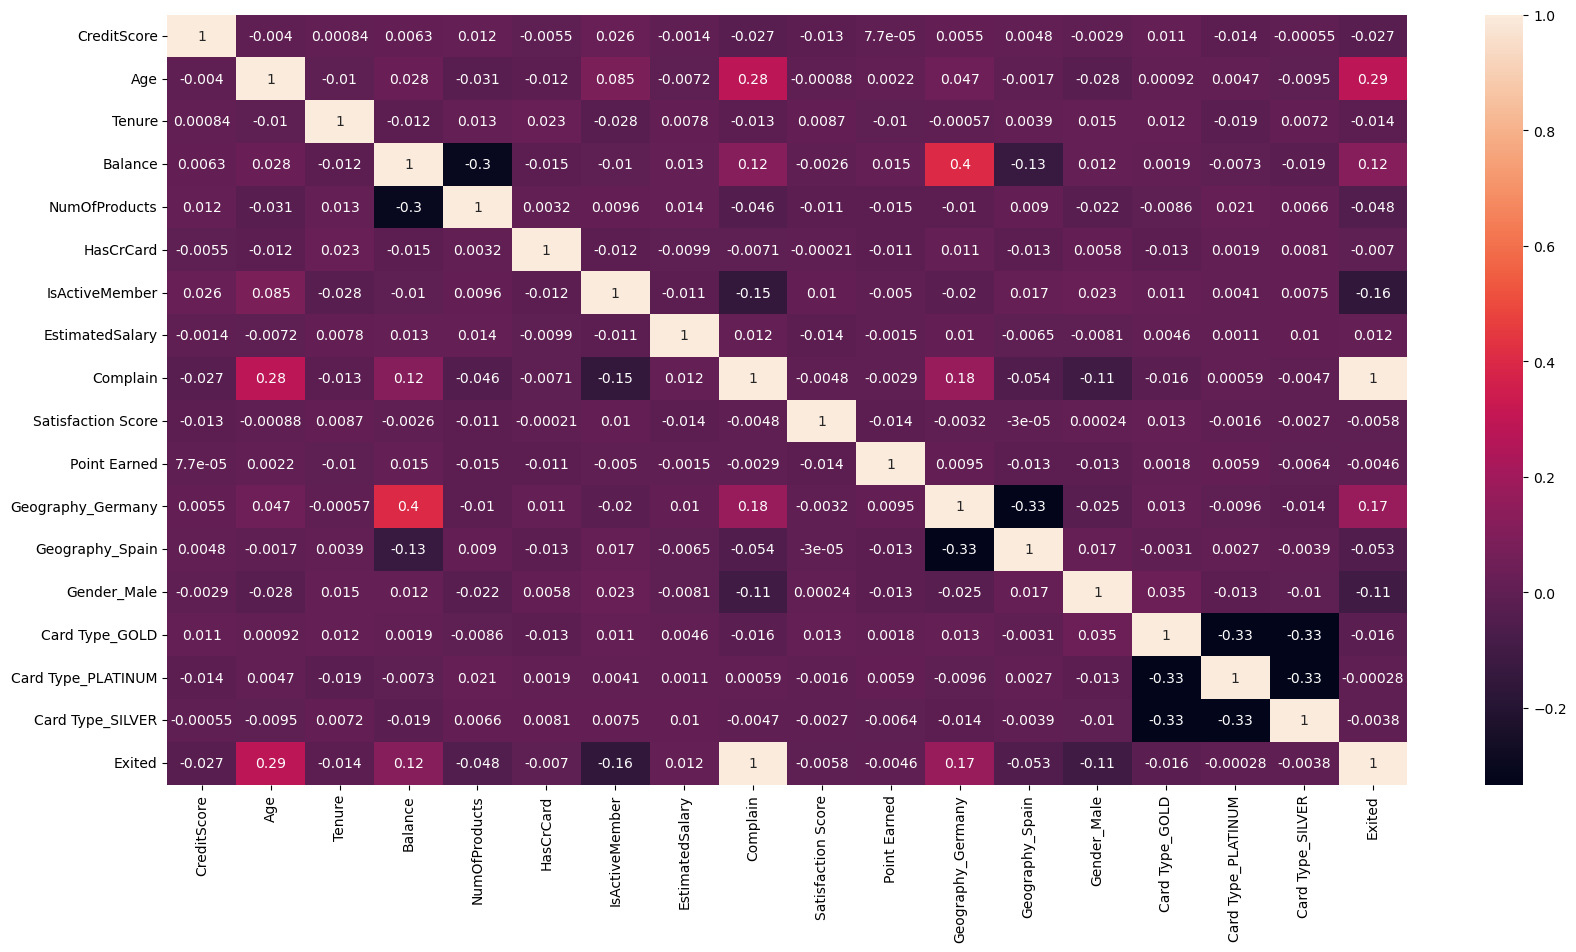

In [188]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

## Checking Target Variable Composition

In [189]:
data['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

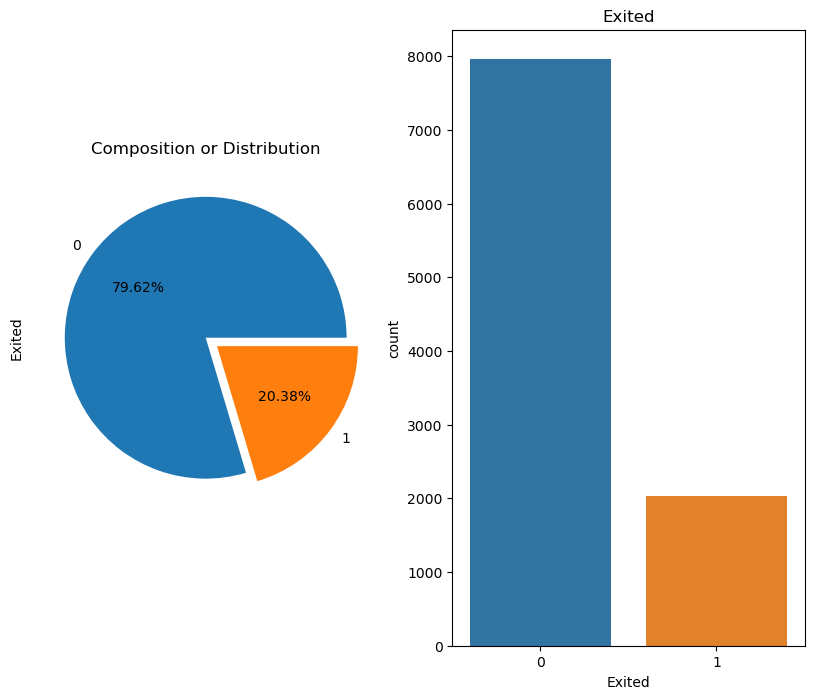

In [190]:
f, ax = plt.subplots(1,2,figsize=(10,8))
data['Exited'].value_counts().plot(kind='pie',autopct='%1.2f%%',ax=ax[0],explode=[0,0.1])
ax[0].set_title('Composition or Distribution')
sns.countplot(data=data,x='Exited',ax=ax[1])
ax[1].set_title('Exited')
plt.show()

**Interpretation:**

Churn prediction datasets are likely to have imbalanced class distribution. The number of customers who have churned is 2038 which is much less than the number of customers who did not churn i.e 7962. There is an imbalance in the target variable.

In [191]:
X=data.drop(columns='Exited')
y=data['Exited']

## Splitting the Dataset into the training and testing set

In [192]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# KNeighbors Classifier

In [193]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier()
model = knnc.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred_knnc = model.predict(X_test)

In [194]:
acc= accuracy_score(y_train,y_train_pred)
f1=f1_score(y_train,y_train_pred)
prec=precision_score(y_train,y_train_pred)
rec=recall_score(y_train,y_train_pred)
results = pd.DataFrame([['KNeighbors Classifier',acc,f1,prec,rec]],columns=['Model','Accuracy','F1 Score','Precision','Recall'])

In [195]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,KNeighbors Classifier,0.998375,0.996028,0.993902,0.998163


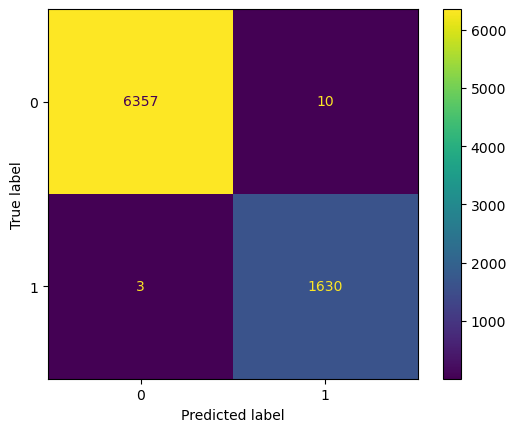

In [196]:
cm = confusion_matrix(y_train,y_train_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [197]:
acc= accuracy_score(y_test,y_pred_knnc)
f1=f1_score(y_test,y_pred_knnc)
prec=precision_score(y_test,y_pred_knnc)
rec=recall_score(y_test,y_pred_knnc)
results = pd.DataFrame([['KNeighbors Classifier',acc,f1,prec,rec]],columns=['Model','Accuracy','F1 Score','Precision','Recall'])

In [198]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,KNeighbors Classifier,0.9995,0.998764,1.0,0.997531


In [199]:
cm = confusion_matrix(y_test,y_pred_knnc)

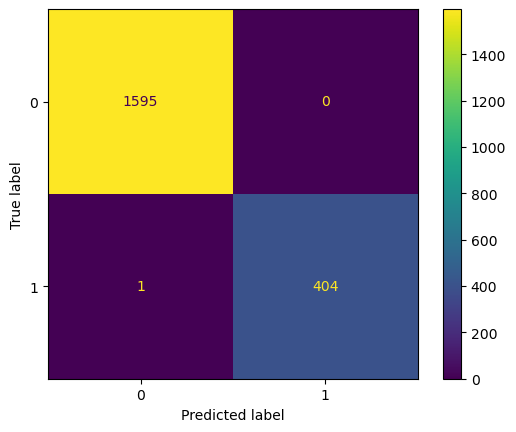

In [200]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [201]:
TN=cm[0,0]
TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]

In [202]:
accuknnc= (TP+TN)/(TP+TN+FP+FN)
precknnc = TP/(TP+FP)
recallknnc = TP/(TP+FN)
f1_scoreknnc = (2*precknnc*recallknnc)/(precknnc+recallknnc)
accuknnc,precknnc,recallknnc

(0.9995, 1.0, 0.9975308641975309)

# DecisionTree Classifier

In [203]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=8)
model = dtc.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_pred_dtc = model.predict(X_test)

In [204]:
temp=pd.DataFrame({'features':model.feature_names_in_,'importance':model.feature_importances_})
temp.sort_values(by='importance',ascending=False)

,features,importance
8,Complain,0.978524
3,Balance,0.004080
2,Tenure,0.003758
10,Point Earned,0.003458
1,Age,0.003233
7,EstimatedSalary,0.003151
4,NumOfProducts,0.001860
13,Gender_Male,0.000668
11,Geography_Germany,0.000510
12,Geography_Spain,0.000415


## Important features:

Complain-0.978524

Balance-0.005037

EstimatedSalary-0.004090

Point Earned-0.003329

Age-0.003233

Tenure-0.001991

NumOfProducts-0.001860

Gender_Male-0.000668

Geography_Germany-0.000510

Geography_Spain-0.000415

In [205]:
# Feature Importance also helps you understand what features are irrelevant for the model.

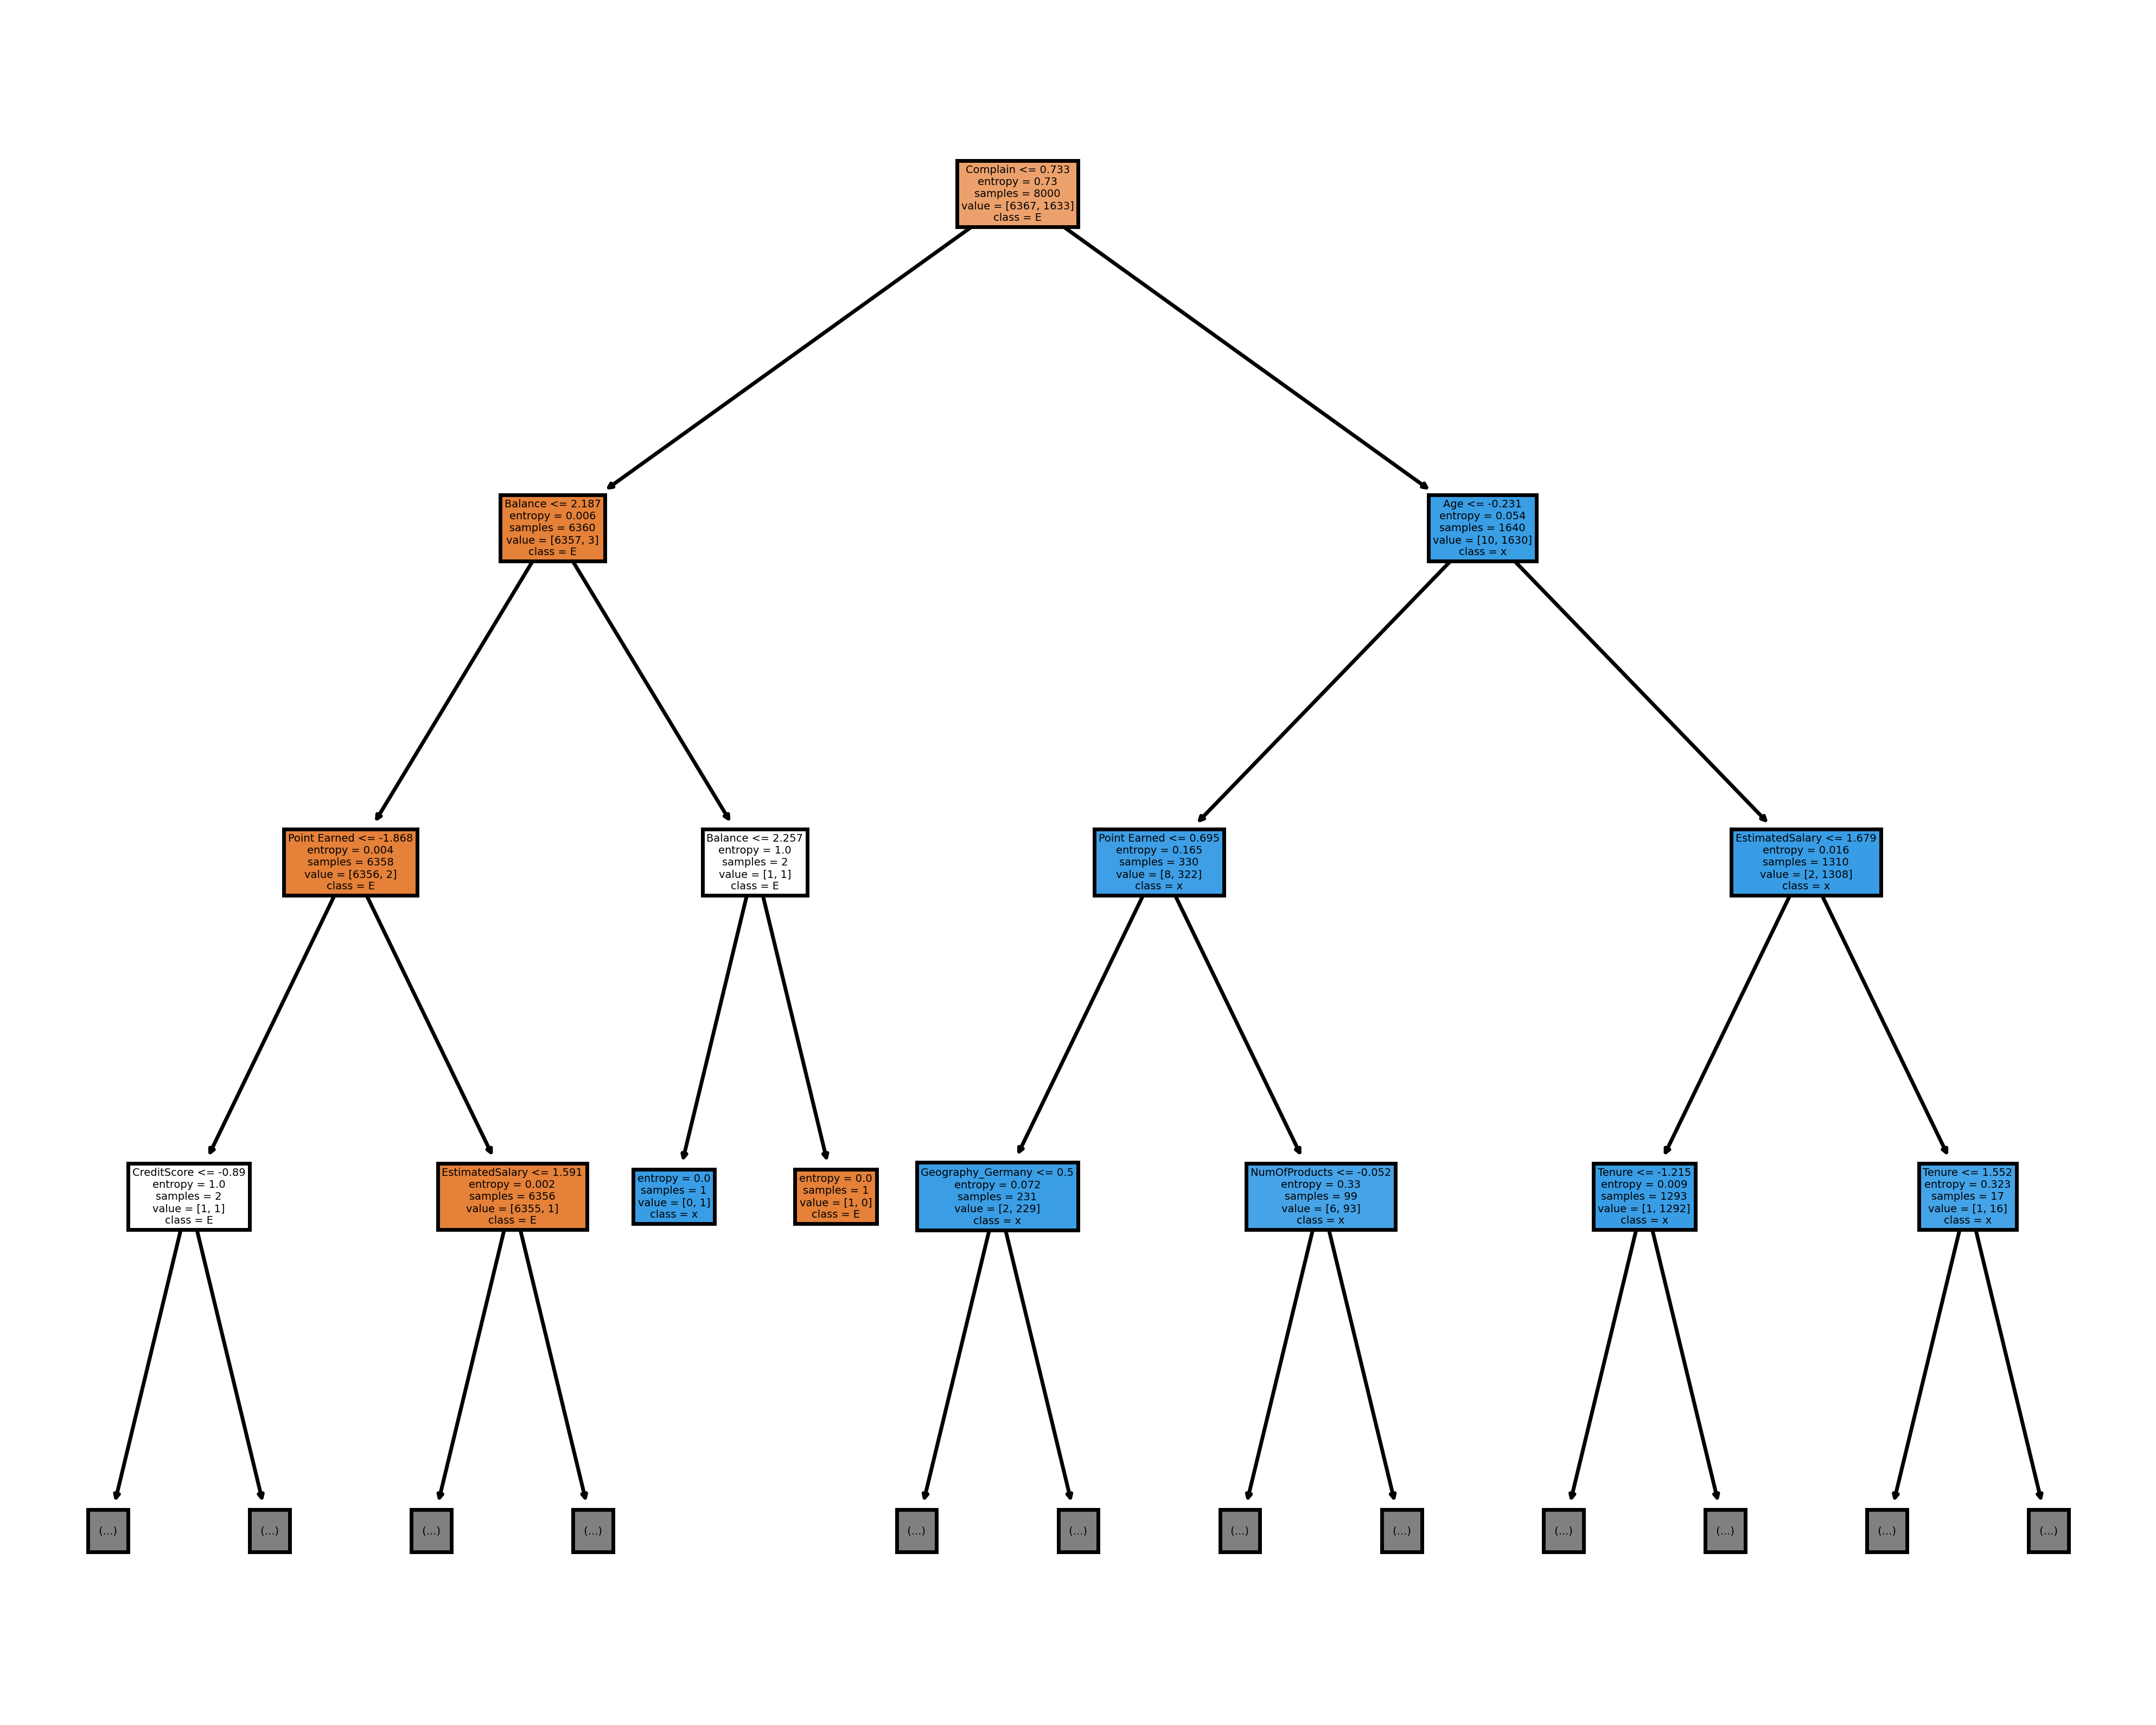

In [206]:
plt.figure(figsize=(10,8),dpi=500)
plot_tree(model,max_depth=3,filled=True, feature_names=X.columns, class_names='Exited')
plt.show()

In [207]:
acc= accuracy_score(y_train,y_train_pred)
f1=f1_score(y_train,y_train_pred)
prec=precision_score(y_train,y_train_pred)
rec=recall_score(y_train,y_train_pred)
results = pd.DataFrame([['KNeighbors Classifier',acc,f1,prec,rec]],columns=['Model','Accuracy','F1 Score','Precision','Recall'])

In [208]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,KNeighbors Classifier,1.0,1.0,1.0,1.0


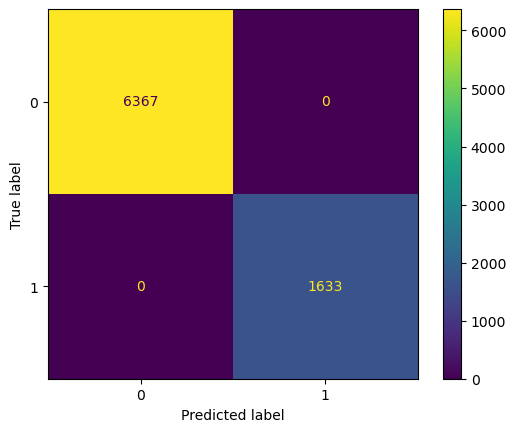

In [209]:
cm = confusion_matrix(y_train,y_train_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [210]:
acc= accuracy_score(y_test,y_pred_dtc)
f1=f1_score(y_test,y_pred_dtc)
prec=precision_score(y_test,y_pred_dtc)
rec=recall_score(y_test,y_pred_dtc)
results = pd.DataFrame([['DecisionTree Classifier',acc,f1,prec,rec]],columns=['Model','Accuracy','F1 Score','Precision','Recall'])

In [211]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,DecisionTree Classifier,0.9975,0.99382,0.99505,0.992593


In [212]:
cm = confusion_matrix(y_test,y_pred_dtc)

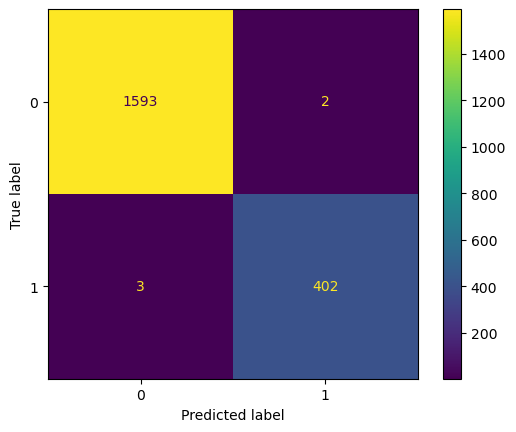

In [213]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [215]:
TN=cm[0,0]
TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]

In [216]:
accudtc= (TP+TN)/(TP+TN+FP+FN)
precdtc = TP/(TP+FP)
recalldtc = TP/(TP+FN)
f1_scoredtc = (2*precdtc*recalldtc)/(precdtc+recalldtc)
accudtc,precdtc,recalldtc,f1_scoredtc

(0.9975, 0.995049504950495, 0.9925925925925926, 0.9938195302843017)

In [228]:
models_performance = pd.DataFrame({'Models':['KNearest Neighbors','Decision Trees'],'Accuracy':[accuknnc,accudtc],'Precision':[precknnc,precdtc],'Recall':[recallknnc,recalldtc],'F1_Score':[f1_scoreknnc,f1_scoredtc]})

In [229]:
models_performance

,Models,Accuracy,Precision,Recall,F1_Score
0,KNearest Neighbors,0.9995,1.00000,0.997531,0.998764
1,Decision Trees,0.9975,0.99505,0.992593,0.993820


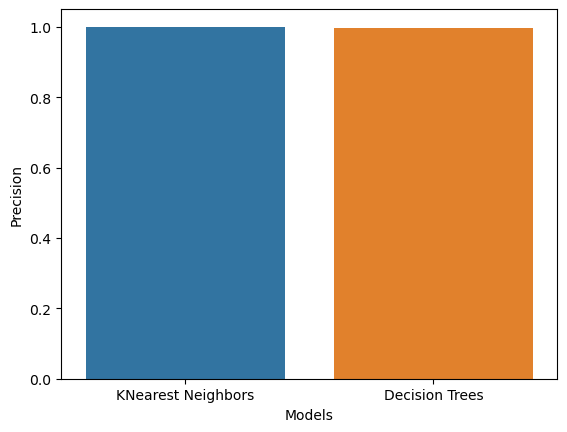

In [233]:
sns.barplot(x=models_performance['Models'],y=models_performance['Precision'])
plt.show()

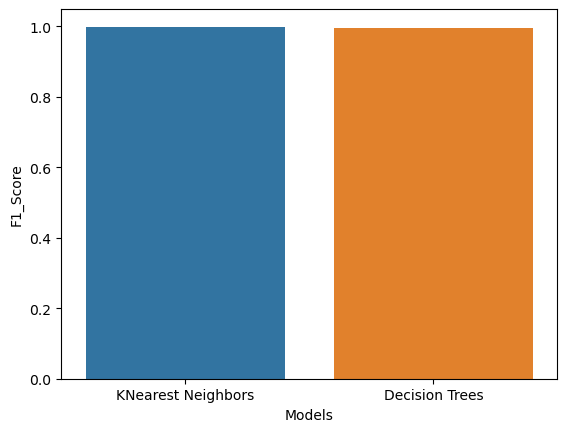

In [232]:
sns.barplot(x=models_performance['Models'],y=models_performance['F1_Score'])
plt.show()

## Conclusion:
1. In Bank churn prediction, the bank bears a big loss when the false positives are more.
2. To decrease the effect of false positives the Precision score need to be high.
3. For making sure we retain the customers who are about to churn we have to make sure Recall is high i.e False Negatives are low.
4. Also when we want to give equal preferrence to decreasing both false positives and false negatives we go for higher F1 score.
5. Both the model are performing great in detecting False positives and False Negatives.